========================================================
# View CALSPEC SED FOR OHP IN JUNE 2017
========================================================

- author Sylvie Dagoret-Campagne
- Affiliation LAL-IN2P3-CNRS
- Work : LSST & StarDice
- date May 5th 2017
- update : May 22th 2017

# Configuration with packages
---------------------------------------------

In [50]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
import pandas as pd
import os
import re

In [52]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [53]:
os.environ['PYSYN_CDBS']

'/Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs'

In [54]:
import astropy
from astropy.io import fits
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

In [55]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo

In [56]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [57]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [58]:
from datetime import datetime
from pytz import timezone
import pytz

In [59]:
from pytz import all_timezones,common_timezones

In [60]:
from astroquery.simbad import Simbad

In [61]:
from astropy.coordinates import get_sun,get_moon

# My Definitions


Here I write the list of stars found by Mac

In [99]:
#MyListOfSelectedCalspecStars=['HD111980','HD160617','HD185975','HD200654','HD205905','VB8','HD209458']
MyListOfSelectedCalspecStars=['HD159222','HD158485','HD163466','HD165459','WD1657+343']


# Initialisation

## Simbad

In [63]:
# Simbad.list_votable_fields()

In [64]:
# Simbad.get_field_description ('flux(filtername)') 

In [65]:
# Simbad.get_votable_fields()

In [66]:
customSimbad = Simbad()

In [67]:
customSimbad.add_votable_fields('flux(U)','flux(B)','flux(V)','flux(R)','flux(I)','flux(J)')

In [68]:
result_table = customSimbad.query_object('VEGA')   # Ask Simbad ALPHA_LYR

In [69]:
print result_table

 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... ------ ------ -----------
* alf Lyr 18 36 56.3363 +38 47 01.280       9 ...   0.07    0.1 -0.18000001


# Query Simbad:
https://astroquery.readthedocs.io/en/latest/simbad/simbad.html

In [70]:
from astroquery.simbad import Simbad

In [71]:
SEDfile_dir=os.path.join(os.environ['PYSYN_CDBS'], 'calspec')

In [72]:
filelist=os.listdir(SEDfile_dir) 

HD209458

In [73]:
filelist

['10lac_stis_001.fits',
 '10lac_stis_002.fits',
 '10lac_stis_003.fits',
 '1732526_nic_002.fits',
 '1732526_stisnic_001.fits',
 '1732526_stisnic_002.fits',
 '1732526_stisnic_003.fits',
 '1740346_nic_001.fits',
 '1740346_nic_002.fits',
 '1740346_stisnic_001.fits',
 '1740346_stisnic_002.fits',
 '1740346_stisnic_003.fits',
 '1743045_nic_001.fits',
 '1743045_nic_002.fits',
 '1743045_stisnic_001.fits',
 '1743045_stisnic_002.fits',
 '1743045_stisnic_003.fits',
 '1757132_stis_001.fits',
 '1757132_stis_002.fits',
 '1757132_stis_003.fits',
 '1802271_nic_002.fits',
 '1802271_stisnic_001.fits',
 '1802271_stisnic_002.fits',
 '1802271_stisnic_003.fits',
 '1805292_nic_001.fits',
 '1805292_nic_002.fits',
 '1805292_stisnic_001.fits',
 '1805292_stisnic_002.fits',
 '1805292_stisnic_003.fits',
 '1808347_stis_001.fits',
 '1808347_stis_002.fits',
 '1808347_stis_003.fits',
 '1812095_nic_001.fits',
 '1812095_nic_002.fits',
 '1812095_stisnic_001.fits',
 '1812095_stisnic_002.fits',
 '1812095_stisnic_003.fits',


## Extract the fits file headers

In [74]:
star_header = []
all_filelist = []
for filename in filelist:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(os.environ['PYSYN_CDBS'], 'calspec',filename)
        hdr = fits.getheader(fullfilename)
        star_header.append(hdr)
        all_filelist.append(filename)

## Extract the object name from the headers

In [75]:
star_names = []
index=0
for hdr in star_header:    
    star_name=star_header[index][7]
    star_names.append(star_name)
    index+=1

In [76]:
#star_names

In [77]:
class CalibSpecStarSmb:
    """
    Class for the CALSPEC stars from Simbad Query
    """
    name = ""          # the name of the star from CALSPEC/Pysynphot
    simbadname=""      # the name of the star returned by Astroquery-Simbad 
    RA =""             # string Right assension
    DEC=""             # string declination
    U=0                # magnitudes
    B=0
    V=0
    R=0
    I=0
    J=0
    filelist = []

    def __init__(self, name,simbname,ra,dec,u,b,v,r,i,j):   # constructor
        self.name=name
        self.simbname=simbname
        self.RA=ra
        self.DEC=dec
        self.U=u
        self.B=b
        self.V=v
        self.R=r
        self.I=i
        self.J=j
        self.filelist = []
    def setFileList(self,files):
        self.filelist=files
    def getFilelist(self):
        return self.filelist
    def show(self):                             # print 
        print 'name=',self.name,', ra=',self.RA,', dec=',self.DEC, ' V=',self.V,'mag'
    def getName(self):                          # getters
        return self.name
    def getRA(self):
        return self.RA
    def getDEC(self):
        return self.DEC  

In [78]:
class CalibSpecStarSkc:
    """
    Class for the CALSPEC stars from SkyCoord Query
    """
    name = ""          # the name of the star from CALSPEC/Pysynphot
    RA =0             # number Right ascension in deg
    DEC=0             # number declination
    
    skycoord=astropy.coordinates.SkyCoord.from_name("VEGA")  # creazy init with Vega

    def __init__(self, name,ra,dec):   # constructor
        self.name=name
        self.RA=ra
        self.DEC=dec
        self.skycoord=astropy.coordinates.SkyCoord.from_name(name)
        
    def show(self):                             # print 
        #print 'name=',self.name,', ra=',self.RA,', dec=',self.DEC
        print 'name',self.name,' :: ', self.skycoord
    def getName(self):                          # getters
        return self.name
    def getRA(self):
        return self.RA
    def getDEC(self):
        return self.DEC 
    def getSkyCoord(self):
        return self.skycoord

## Loop on entries to get info on coordinates on CALSPEC from Simbad

- This is a way to sort the good name for stars
- Moreover it does not crash if Simbad does not recognize a name

In [79]:
All_CALSPEC_Stars_InSimbad = {} #dictionnary of stars
count =0
for name in star_names: # loop on star names from Pysynphot-CALSPEC
    result_table = customSimbad.query_object(name)   # Ask Simbad
    if result_table != None:                   #check if Simbad has found the star
        count+=1
        print "---------------------",count,') ',name,'-------------------------'
        print result_table
        # create an object with the found star
        newstar=CalibSpecStarSmb(name,result_table["MAIN_ID"][0],result_table["RA"][0],result_table["DEC"][0],result_table["FLUX_U"][0],result_table["FLUX_B"][0],result_table["FLUX_V"][0],result_table["FLUX_R"][0],result_table["FLUX_I"][0],result_table["FLUX_J"][0])
        # fill the dictionnary only if there is no instance of that star already in dictionnary
        if not newstar.getName() in All_CALSPEC_Stars_InSimbad.keys():
            All_CALSPEC_Stars_InSimbad[newstar.getName()]= newstar # fill the directionary with the new star- object
            

--------------------- 1 )  10LAC -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- ------------- ------------- ------- ... ------ --------- ---------
*  10 Lac 22 39 15.6786 +39 03 00.971       9 ...   4.98 5.1900001 5.3899999
--------------------- 2 )  10LAC -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- ------------- ------------- ------- ... ------ --------- ---------
*  10 Lac 22 39 15.6786 +39 03 00.971       9 ...   4.98 5.1900001 5.3899999
--------------------- 3 )  10LAC -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- ------------- ------------- ------- ... ---

In [80]:
print " Number of CALSPEC stars recognised by Simbad : ",len(All_CALSPEC_Stars_InSimbad)

 Number of CALSPEC stars recognised by Simbad :  41


### shows list of CALSPEC stars from SimBad

In [81]:
print All_CALSPEC_Stars_InSimbad.keys()

['10LAC', 'HD205905', 'HD14943', 'HD37725', 'HD160617', 'FEIGE34', 'HD159222', 'HZ43', 'HZ44', 'HZ21', 'WD1057+719', 'HZ4', 'FEIGE110', 'HD031128', 'GD71', 'HD209458', 'SIRIUS', 'WD0320-539', 'HD111980', 'HD009051', 'HD60753', 'LDS749B', 'HD180609', 'HD158485', 'HD37962', 'HD163466', 'HD185975', 'G191B2B', 'HD116405', 'ALPHA_LYR', 'HD200654', 'HZ43B', 'WD1657+343', 'HD165459', 'HD93521', 'GD153', 'WD0308-565', 'HD38949', 'VB8', 'HD106252', 'HD074000']


## From SkyCoord, also get the coordinates of the star

In [82]:
All_CALSPEC_Stars_InSkyCoord = {} #dictionnary of stars
for starnam in All_CALSPEC_Stars_InSimbad.keys():
    starloc=astropy.coordinates.SkyCoord.from_name(starnam)
    newstar=CalibSpecStarSkc(starnam,starloc.ra.deg,starloc.dec.deg)
    All_CALSPEC_Stars_InSkyCoord [starnam] = newstar

In [83]:
print " Number of CALSPEC stars recognised by SkyCoord : ",len(All_CALSPEC_Stars_InSkyCoord)

 Number of CALSPEC stars recognised by SkyCoord :  41


In [84]:
print All_CALSPEC_Stars_InSkyCoord.keys()

['10LAC', 'HD205905', 'WD0320-539', 'HD37725', 'HD160617', 'FEIGE34', 'HD159222', 'HZ43', 'HZ44', 'HZ21', 'WD1057+719', 'HZ4', 'FEIGE110', 'HD031128', 'GD71', 'HD209458', 'SIRIUS', 'ALPHA_LYR', 'HD111980', 'HD009051', 'HD60753', 'LDS749B', 'HD180609', 'HD158485', 'HD37962', 'HD163466', 'HD185975', 'G191B2B', 'HD116405', 'HD14943', 'HD200654', 'HZ43B', 'WD1657+343', 'HD165459', 'HD93521', 'GD153', 'WD0308-565', 'HD38949', 'VB8', 'HD106252', 'HD074000']


In [85]:
for key, starobj in All_CALSPEC_Stars_InSkyCoord.iteritems():
    print starobj.show()

name 10LAC  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 339.81532766,  39.05026977)>
None
name HD205905  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 324.79229796, -27.30657448)>
None
name WD0320-539  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 50.561792, -53.754583)>
None
name HD37725  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 85.47654458,  29.29747917)>
None
name HD160617  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 265.70551677, -40.32097928)>
None
name FEIGE34  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 159.90308495,  43.10257086)>
None
name HD159222  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 263.00413544,  34.27114733)>
None
name HZ43  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 199.0910417,  29.0987222)>
None
name HZ44  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 200.8969333,  36.1332056)>
None
name HZ21  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 183.484295,  32.9420947)>
None
name WD1057+719  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 165.1447937,  71.6344664)>

# SED files
--------------------



## Group all files 

In [86]:
 # filelist

### Group files according star name

In [87]:
old_star = None
for Starnam in All_CALSPEC_Stars_InSimbad.keys():
    if Starnam != old_star: 
        if old_star != None:
            All_CALSPEC_Stars_InSimbad[old_star].setFileList(star_files)
        star_files = []
        old_star=Starnam
        
    starnam=Starnam.lower()
    for file in filelist:
        if re.search(Starnam,file) or re.search(starnam,file):
            star_files.append(file)
All_CALSPEC_Stars_InSimbad[old_star].setFileList(star_files)   # don't forget last file

### View the lists of files

In [88]:
for Starnam in All_CALSPEC_Stars_InSimbad.keys():
    print Starnam, ' :: \t ',All_CALSPEC_Stars_InSimbad[Starnam].getFilelist()

10LAC  :: 	  ['10lac_stis_001.fits', '10lac_stis_002.fits', '10lac_stis_003.fits']
HD205905  :: 	  ['hd205905_stis_001.fits', 'hd205905_stis_002.fits', 'hd205905_stis_003.fits']
HD14943  :: 	  ['hd14943_stis_001.fits', 'hd14943_stis_002.fits', 'hd14943_stis_003.fits']
HD37725  :: 	  ['hd37725_stis_001.fits', 'hd37725_stis_002.fits', 'hd37725_stis_003.fits']
HD160617  :: 	  ['hd160617_stis_001.fits', 'hd160617_stis_002.fits', 'hd160617_stis_003.fits']
FEIGE34  :: 	  ['feige34_005.fits', 'feige34_stis_001.fits', 'feige34_stis_002.fits', 'feige34_stis_003.fits', 'feige34_stis_004.fits']
HD159222  :: 	  ['hd159222_stis_001.fits', 'hd159222_stis_002.fits', 'hd159222_stis_003.fits']
HZ43  :: 	  ['hz43_fos_003.fits', 'hz43_mod_004.fits', 'hz43_mod_005.fits', 'hz43_mod_008.fits', 'hz43_mod_009.fits', 'hz43_mod_010.fits', 'hz43_stis_001.fits', 'hz43_stis_002.fits', 'hz43_stis_003.fits', 'hz43_stis_004.fits', 'hz43b_stis_001.fits', 'hz43b_stis_002.fits', 'hz43b_stis_003.fits', 'hz43b_stis_004.fi

# View spectra

## View a single Spectrum

In [89]:
SELECTED_STAR_NAME='HD159222'

In [90]:
theStar=All_CALSPEC_Stars_InSimbad[SELECTED_STAR_NAME]

In [91]:
thefilelist=theStar.getFilelist()

In [92]:
thefilelist

['hd159222_stis_001.fits', 'hd159222_stis_002.fits', 'hd159222_stis_003.fits']

Filename: /Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs/calspec/hd159222_stis_001.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      71   ()      
  1  SCI         BinTableHDU     39   3739R x 7C   [1E, 1E, 1E, 1E, 1E, 1I, 1E]   
Filename: /Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs/calspec/hd159222_stis_002.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      71   ()      
  1  SCI         BinTableHDU     39   3739R x 7C   [1E, 1E, 1E, 1E, 1E, 1I, 1E]   
Filename: /Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs/calspec/hd159222_stis_003.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      71   ()      
  1  SCI         BinTableHDU     39   3739R x 7C   [1D, 1E, 1E, 1E, 1E, 1I, 1E]   


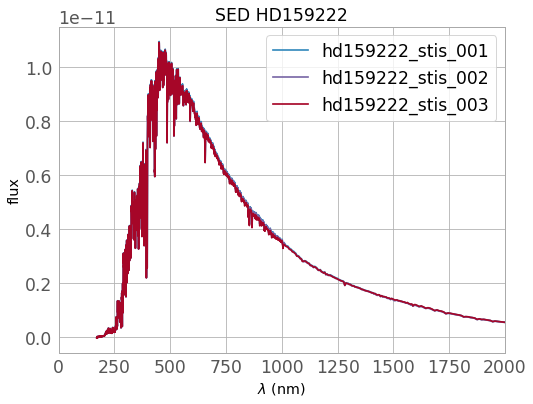

In [93]:
starname=SELECTED_STAR_NAME
for file in thefilelist:
        fullfilename=os.path.join(os.environ['PYSYN_CDBS'], 'calspec',file)
        hdulist=fits.open(fullfilename)
        hdulist.info()
        table_data=hdulist[1].data
        #print table_data.columns  # shows the columns names of the table
        wavelengths=table_data.field('WAVELENGTH')/10.
        flux=table_data.field('FLUX')
        title='SED '+starname
        plt.plot(wavelengths,flux,label=file.split('.')[0])
        plt.title(title)
        plt.ylabel('flux')
        #plt.xlabel(starburst.waveunits)
        #ylabel(starburst.fluxunits)
        plt.xlabel('$\lambda$ (nm)')
        plt.xlim(0,2000)
        plt.legend()

In [94]:
def PlotSED(starname,thefilelist):
    plt.figure()
    for file in thefilelist:
        fullfilename=os.path.join(os.environ['PYSYN_CDBS'], 'calspec',file)
        hdulist=fits.open(fullfilename)
        #hdulist.info()
        table_data=hdulist[1].data
        #print table_data.columns  # shows the columns names of the table
        wavelengths=table_data.field('WAVELENGTH')/10.
        flux=table_data.field('FLUX')
        title='SED '+starname
        plt.plot(wavelengths,flux,label=file.split('.')[0])
        plt.title(title)
        plt.ylabel('flux')
        plt.xlabel('$\lambda$ (nm)')
        plt.xlim(0,2000)
        plt.legend()
        hdulist.close()
    figfilename=starname+'.pdf'
    plt.savefig(figfilename)

In [95]:
def PlotSED2(starname,thefilelist):
    plt.figure()
    for file in thefilelist:
        fullfilename=os.path.join(os.environ['PYSYN_CDBS'], 'calspec',file)
        star_sed= S.FileSpectrum(fullfilename)        
        title='SED '+starname
        plt.plot(star_sed.wave,star_sed.flux,label=file.split('.')[0])
        plt.title(title)
        plt.ylabel(star_sed.fluxunits)
        plt.xlabel(star_sed.waveunits)
        plt.xlim(0,20000)
        plt.legend()
    figfilename=starname+'_2'+'.pdf'
    plt.savefig(figfilename)
        

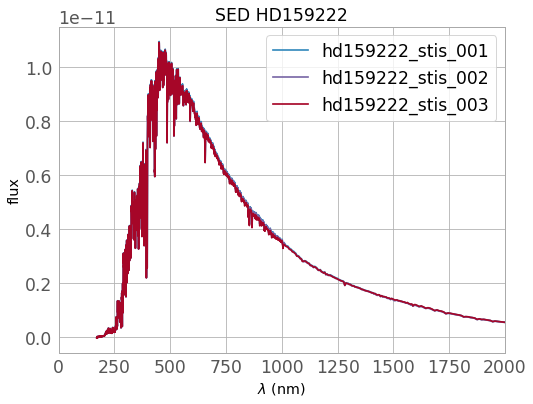

In [96]:
PlotSED(SELECTED_STAR_NAME,thefilelist)

HD159222  =  HD159222
HD158485  =  HD158485
HD163466  =  HD163466
HD165459  =  HD165459


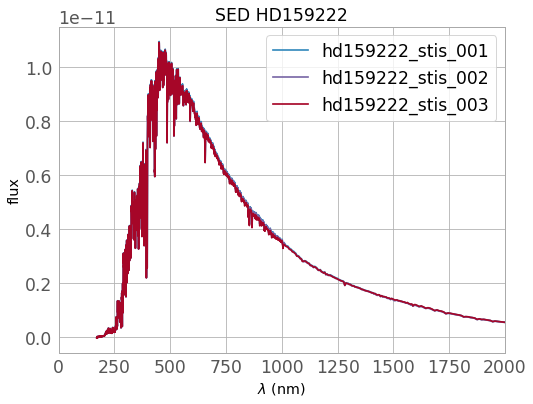

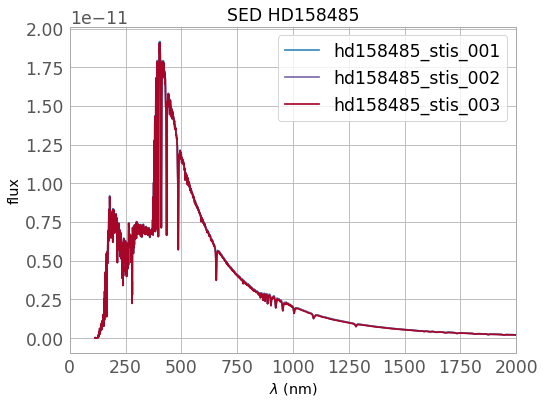

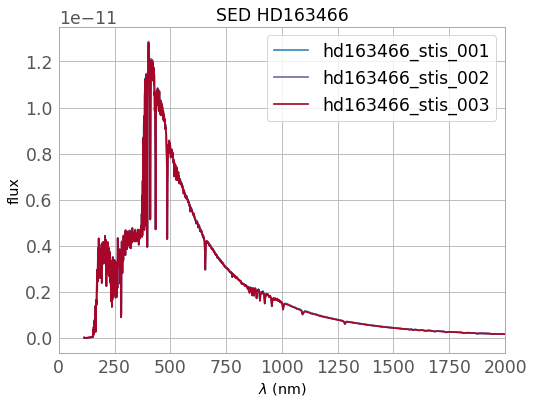

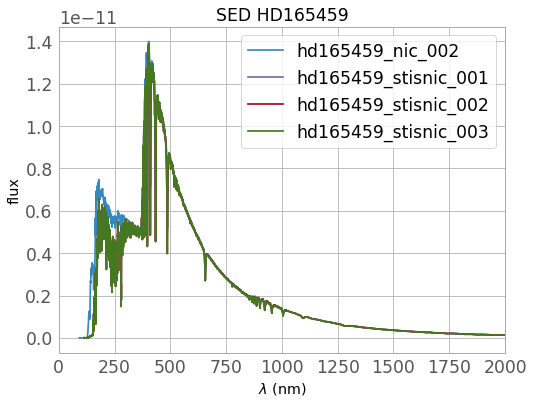

In [97]:
# Loop on all CALSPEC star found in Simbad
for Starnam in All_CALSPEC_Stars_InSimbad.keys():
    # Loop on Selected CALSPEC stars
    for starselec in MyListOfSelectedCalspecStars:
        if re.search(starselec,Starnam):
            print starselec, ' = ',Starnam
            PlotSED(Starnam,All_CALSPEC_Stars_InSimbad[Starnam].getFilelist())

HD159222  =  HD159222
Warning, 12 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 3739 bins contained negative fluxes; they have been set to zero.
HD158485  =  HD158485
Warning, 3 of 4683 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 4683 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 4683 bins contained negative fluxes; they have been set to zero.
HD163466  =  HD163466
Warning, 44 of 4685 bins contained negative fluxes; they have been set to zero.
Warning, 44 of 4685 bins contained negative fluxes; they have been set to zero.
Warning, 44 of 4685 bins contained negative fluxes; they have been set to zero.
HD165459  =  HD165459
Warning, 19 of 4834 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 4834 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 4827 bins contained 

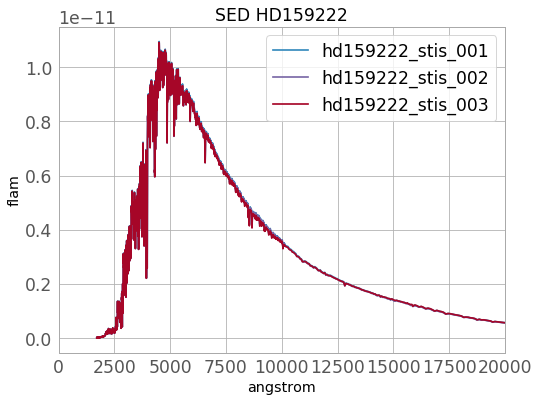

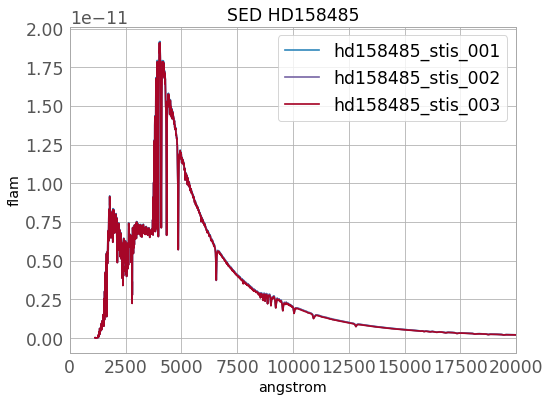

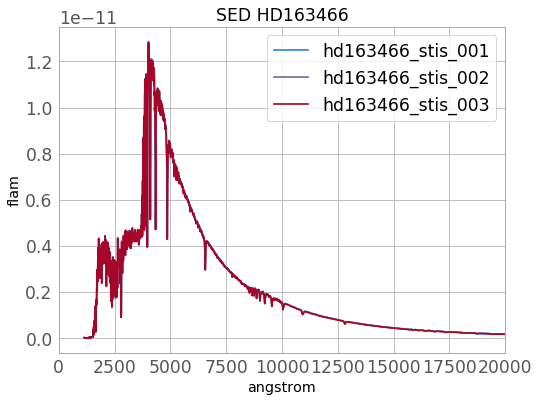

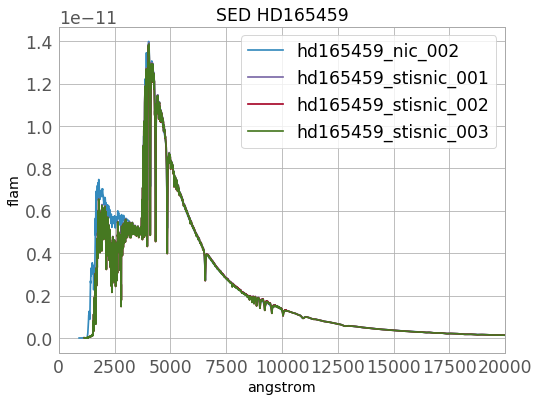

In [98]:
# Loop on all CALSPEC star found in Simbad
for Starnam in All_CALSPEC_Stars_InSimbad.keys():
    # Loop on Selected CALSPEC stars
    for starselec in MyListOfSelectedCalspecStars:
        if re.search(starselec,Starnam):
            print starselec, ' = ',Starnam
            PlotSED2(Starnam,All_CALSPEC_Stars_InSimbad[Starnam].getFilelist())

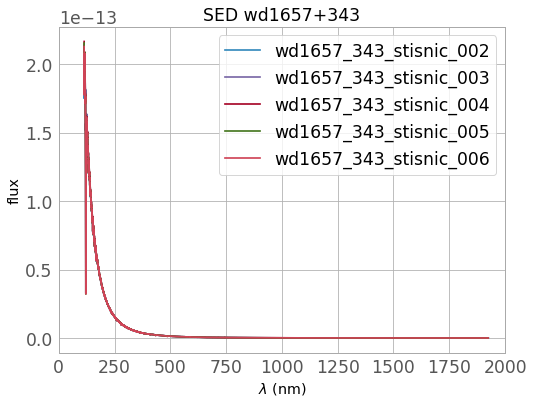

In [102]:
PlotSED('wd1657+343',['wd1657_343_stisnic_002.fits','wd1657_343_stisnic_003.fits','wd1657_343_stisnic_004.fits','wd1657_343_stisnic_005.fits','wd1657_343_stisnic_006.fits'])